# Clusters

In this notebook we are going to analyze the data that contains information about clustering. In order to do so, it is necessary to have executed `dat_clusters.py` which uses the folder `dat_labels` and generate:
- The folder `dat_clusters` that includes the .dat with the information of the number of clusters and size of biggest cluster of both round and elongated cells for every step and seed.
- The folder `cluster_distributions_final` that includes a .csv with all the sizes of clusters found in every seed for the last step.

## Cluster evolution

We are going to start investigating how the number of clusters and the biggest cluster size varies through time given a density.

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

We define some relevant parameters that remains constant during the simulations.

In [2]:
nc = 10_000
cell_area = np.pi
max_step = 60_000
step = 100
delta_t = 0.05

# All the seeds
number_of_realizations=64

seed_1 = 0x87351080E25CB0FAD77A44A3BE03B491
rng_1 = np.random.default_rng(seed_1)

rng_seed = rng_1.integers(
            low=2**20, high=2**50, size=number_of_realizations
        )

We start creating a function that make a list with the mean of each variable (number of clusters and biggest cluster size) for each step.

In [3]:
def calculate_clusters_vs_time(num_cells, dens, max_step, step, rng_seed):
    """
    Function that calculates both the amount of clusters and the biggest 
    cluster`s size against time for a given density.

    Returns a dataframe with all the data
    """
    # Initialize the lists for label 1
    number_clusters_round = []
    biggest_cluster_size_round = []
    number_clusters_elongated = []
    biggest_cluster_size_elongated = []
    # Initialize the lists for label 2
    number_clusters_round_2 = []
    biggest_cluster_size_round_2 = []
    number_clusters_elongated_2 = []
    biggest_cluster_size_elongated_2 = []
    # Define a boolean to stop where there are no more data
    stop = False
    # Initialize a list with the valid steps
    valid_steps = []
    # Name of the density folder to read the data
    dens_folder = f"{dens:.2f}".replace(".", "_")
    for tic in range(100, max_step, step):
        # Initialize arrays to calculate the mean of every seed in this step
        number_clusters_round_step = np.array([])
        biggest_cluster_size_round_step = np.array([])
        number_clusters_elongated_step = np.array([])
        biggest_cluster_size_elongated_step = np.array([])
        # and for label 2
        number_clusters_round_step_2 = np.array([])
        biggest_cluster_size_round_step_2 = np.array([])
        number_clusters_elongated_step_2 = np.array([])
        biggest_cluster_size_elongated_step_2 = np.array([])
        # For each seed we read the file
        for seed in rng_seed:
            dat_actual = (
                    f"{dens_folder}/dat_clusters/clusters_culture_initial_number_of_cells={num_cells}_density={dens}_"
                    f"force=Anisotropic_Grosmann_k=3.33_gamma=3_With_Noise_eta=0.033_With_Shrinking_"
                    f"rng_seed={seed}_step={tic:05}.dat"
                )
            if os.path.exists(dat_actual):
                df_tic = pd.read_csv(dat_actual)
            else:
                stop = True
                break
            # Take parameters of this particular seed
            number_clusters_round_seed = df_tic["n_round"].mean()
            biggest_cluster_size_round_seed = df_tic["max_round"].mean()
            number_clusters_elongated_seed = df_tic["n_elongated"].mean()
            biggest_cluster_size_elongated_seed = df_tic["max_elongated"].mean()
            # and for label 2
            number_clusters_round_seed_2 = df_tic["n_round_2"].mean()
            biggest_cluster_size_round_seed_2 = df_tic["max_round_2"].mean()
            number_clusters_elongated_seed_2 = df_tic["n_elongated_2"].mean()
            biggest_cluster_size_elongated_seed_2 = df_tic["max_elongated_2"].mean()
            # Add them to the steps's array
            number_clusters_round_step = np.append(number_clusters_round_step, number_clusters_round_seed)
            biggest_cluster_size_round_step = np.append(biggest_cluster_size_round_step, biggest_cluster_size_round_seed)
            number_clusters_elongated_step = np.append(number_clusters_elongated_step, number_clusters_elongated_seed)
            biggest_cluster_size_elongated_step = np.append(biggest_cluster_size_elongated_step, biggest_cluster_size_elongated_seed)
            # and for label 2
            number_clusters_round_step_2 = np.append(number_clusters_round_step_2, number_clusters_round_seed_2)
            biggest_cluster_size_round_step_2 = np.append(biggest_cluster_size_round_step_2, biggest_cluster_size_round_seed_2)
            number_clusters_elongated_step_2 = np.append(number_clusters_elongated_step_2, number_clusters_elongated_seed_2)
            biggest_cluster_size_elongated_step_2 = np.append(biggest_cluster_size_elongated_step_2, biggest_cluster_size_elongated_seed_2)
        # We stop reading if the boolean is True
        if stop is True:
            last_step = tic-step
            print("Last step = ", last_step, " for density = ", dens)
            break
        valid_steps.append(tic)
        # Calculate the mean for every seed in that step
        number_clusters_round_mean = np.mean(number_clusters_round_step)
        biggest_cluster_size_round_mean = np.mean(biggest_cluster_size_round_step)
        number_clusters_elongated_mean = np.mean(number_clusters_elongated_step)
        biggest_cluster_size_elongated_mean = np.mean(biggest_cluster_size_elongated_step)
        # and for label 2
        number_clusters_round_mean_2 = np.mean(number_clusters_round_step_2)
        biggest_cluster_size_round_mean_2 = np.mean(biggest_cluster_size_round_step_2)
        number_clusters_elongated_mean_2 = np.mean(number_clusters_elongated_step_2)
        biggest_cluster_size_elongated_mean_2 = np.mean(biggest_cluster_size_elongated_step_2)
        # Add them to the global list
        number_clusters_round.append(number_clusters_round_mean)
        biggest_cluster_size_round.append(biggest_cluster_size_round_mean)
        number_clusters_elongated.append(number_clusters_elongated_mean)
        biggest_cluster_size_elongated.append(biggest_cluster_size_elongated_mean)
        # and for label 2
        number_clusters_round_2.append(number_clusters_round_mean_2)
        biggest_cluster_size_round_2.append(biggest_cluster_size_round_mean_2)
        number_clusters_elongated_2.append(number_clusters_elongated_mean_2)
        biggest_cluster_size_elongated_2.append(biggest_cluster_size_elongated_mean_2)

    # Create the dataframe
    df = pd.DataFrame({
        "step": valid_steps,
        "N_round": number_clusters_round,
        "MAX_round": biggest_cluster_size_round,
        "N_elongated": number_clusters_elongated,
        "MAX_elongated": biggest_cluster_size_elongated,
        "N_round_2": number_clusters_round_2,
        "MAX_round_2": biggest_cluster_size_round_2,
        "N_elongated_2": number_clusters_elongated_2,
        "MAX_elongated_2": biggest_cluster_size_elongated_2
    })

    return df

### Particular density

In the case we want to see only one particular density, continue as follows. We get the dataframe with the function and then plot it.

In [4]:
dens_input = input("Enter density (for example 0.90): ")
try:
    density = float(dens_input)
except ValueError:
    print("Error")
    exit()
df = calculate_clusters_vs_time(num_cells=nc, dens=density, max_step=max_step, step=step, rng_seed=rng_seed)
#df.to_csv("{density_folder}/clusters_vs_time.csv", index=False)

Last step =  50000  for density =  0.5


In [5]:
def plot_cluster_evolution(df, dens):
    """ Function to plot the 4 graphs corresponding to clustering in one figure. 

    The first plot is the biggest cluster size for both clusters and label 1.
    The second plot is the number of clusters for both clusters and label 1.
    The third plot is the biggest cluster size for both clusters and label 2.
    The fourth plot is the number of clusters for both clusters and label 2.
    """
    fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

    # First plot
    axs[0, 0].plot(df["step"], df["MAX_round"], label="Round", color="blue")
    axs[0, 0].plot(df["step"], df["MAX_elongated"], label="Elongated", color="red")
    axs[0, 0].set_title("Max cluster size (label 1)")
    axs[0, 0].set_ylabel("Size")
    axs[0, 0].legend()

    # Second plot
    axs[1, 0].plot(df["step"], df["N_round"], label="Round", color="blue")
    axs[1, 0].plot(df["step"], df["N_elongated"], label="Elongated", color="red")
    axs[1, 0].set_title("Number of clusters (label 1)")
    axs[1, 0].set_xlabel("Step")
    axs[1, 0].set_ylabel("Number")
    axs[1, 0].legend()

    # Third plot
    axs[0, 1].plot(df["step"], df["MAX_round_2"], label="Round", color="blue")
    axs[0, 1].plot(df["step"], df["MAX_elongated_2"], label="Elongated", color="red")
    axs[0, 1].set_title("Max cluster size (label 2)")
    axs[0, 1].set_ylabel("Size")
    axs[0, 1].legend()

    # Fourth plot
    axs[1, 1].plot(df["step"], df["N_round_2"], label="Round", color="blue")
    axs[1, 1].plot(df["step"], df["N_elongated_2"], label="Elongated", color="red")
    axs[1, 1].set_title("Number of clusters (label 2)")
    axs[1, 1].set_xlabel("Step")
    axs[1, 1].set_ylabel("Number")
    axs[1, 1].legend()

    fig.suptitle(f"Cluster Evolution vs Time (density = {dens})")
    plt.tight_layout()

    # Guardar el gráfico
    folder_path = f"graphs/clusters/{dens:.2f}".replace(".", "_")
    os.makedirs(folder_path, exist_ok=True)
    output_path = os.path.join(folder_path, f"cluster_evolution_density_{dens:.2f}.png")
    plt.savefig(output_path)

    # Mostrar (opcional)
    plt.show()

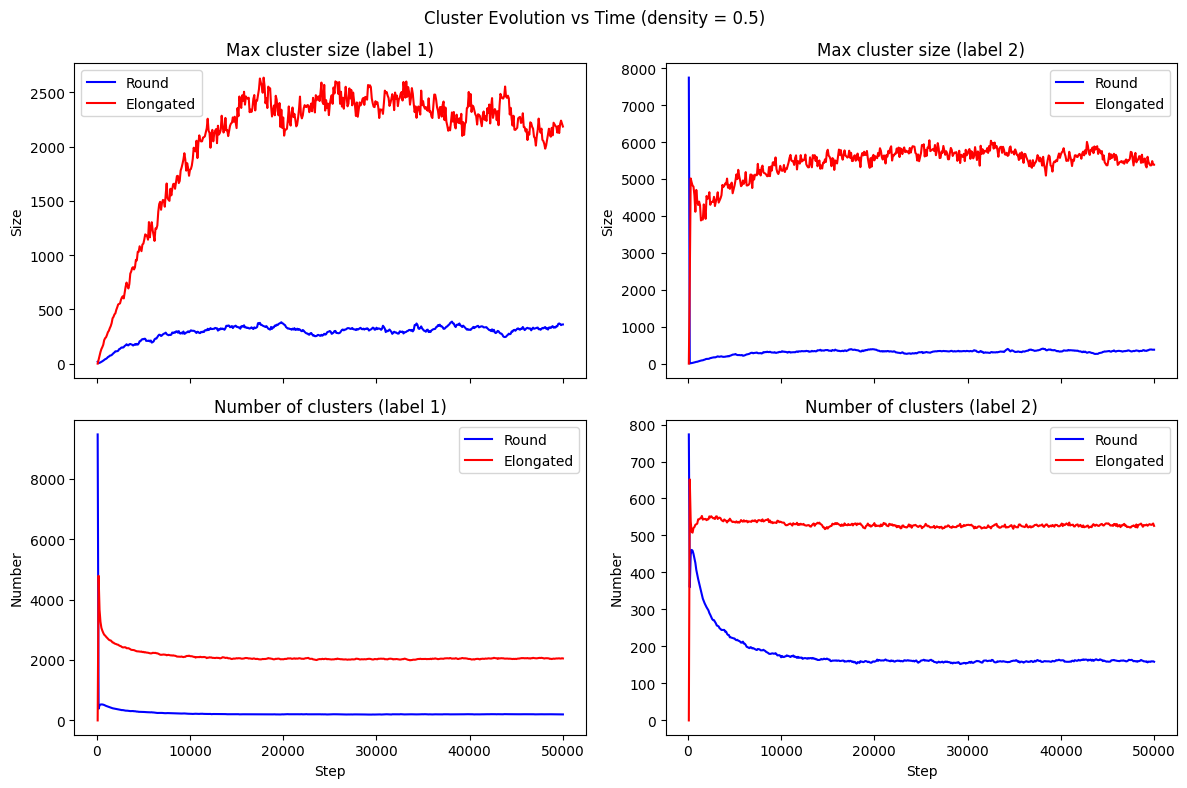

In [6]:
plot_cluster_evolution(df, dens=density)


### All densities

In the case we want to see all the densities, we can proceed like this: 

Last step =  50000  for density =  0.5


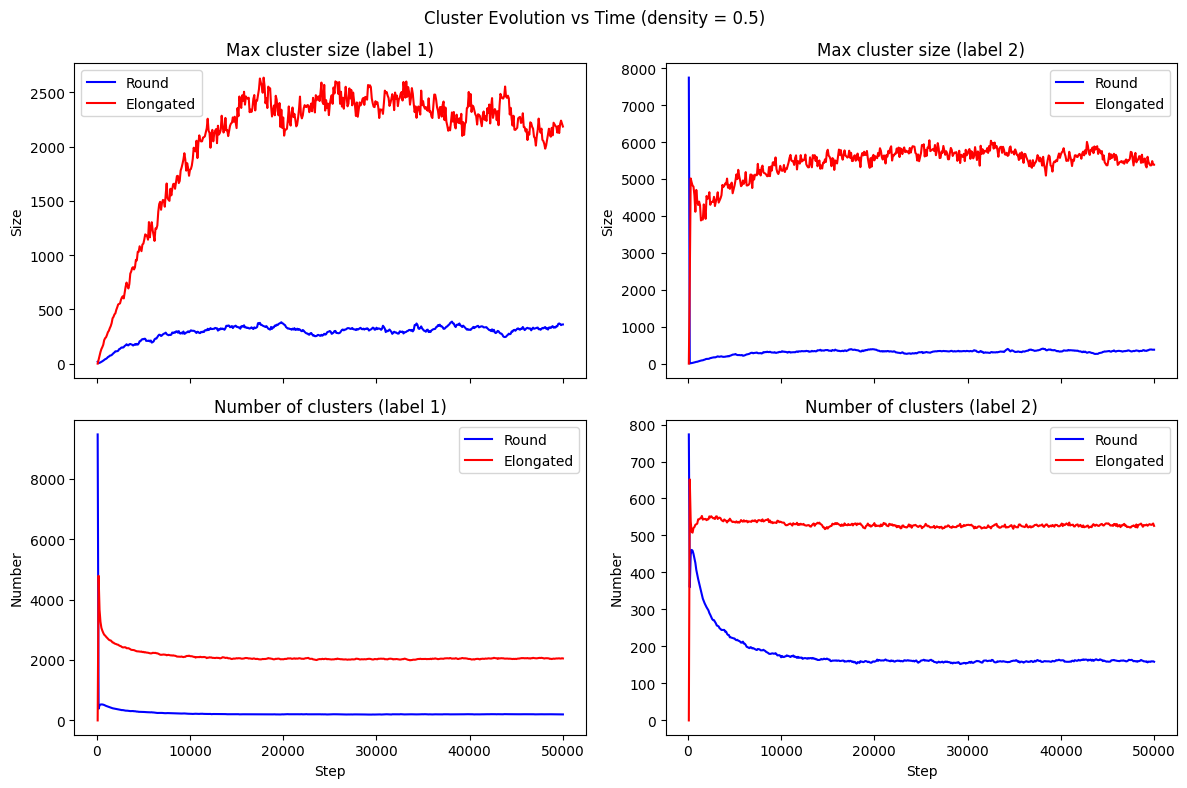

Last step =  50000  for density =  0.6


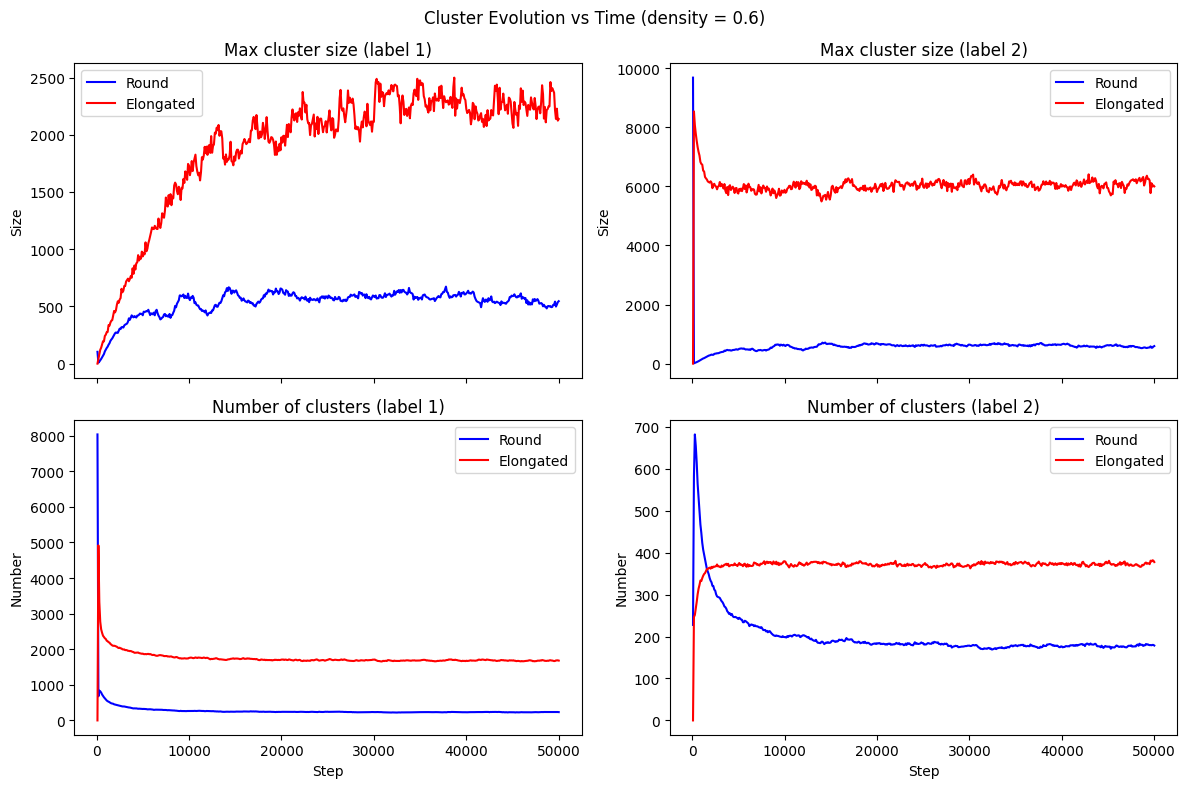

Last step =  50000  for density =  0.7


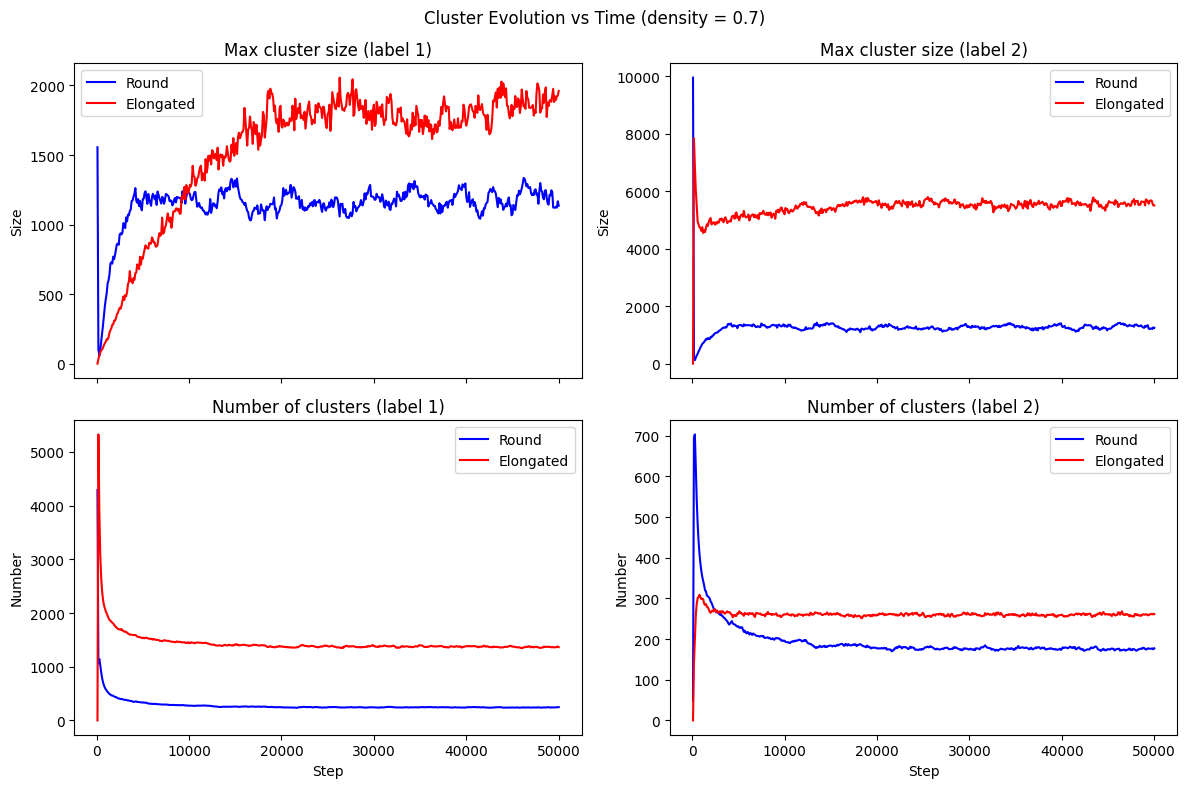

Last step =  50000  for density =  0.8


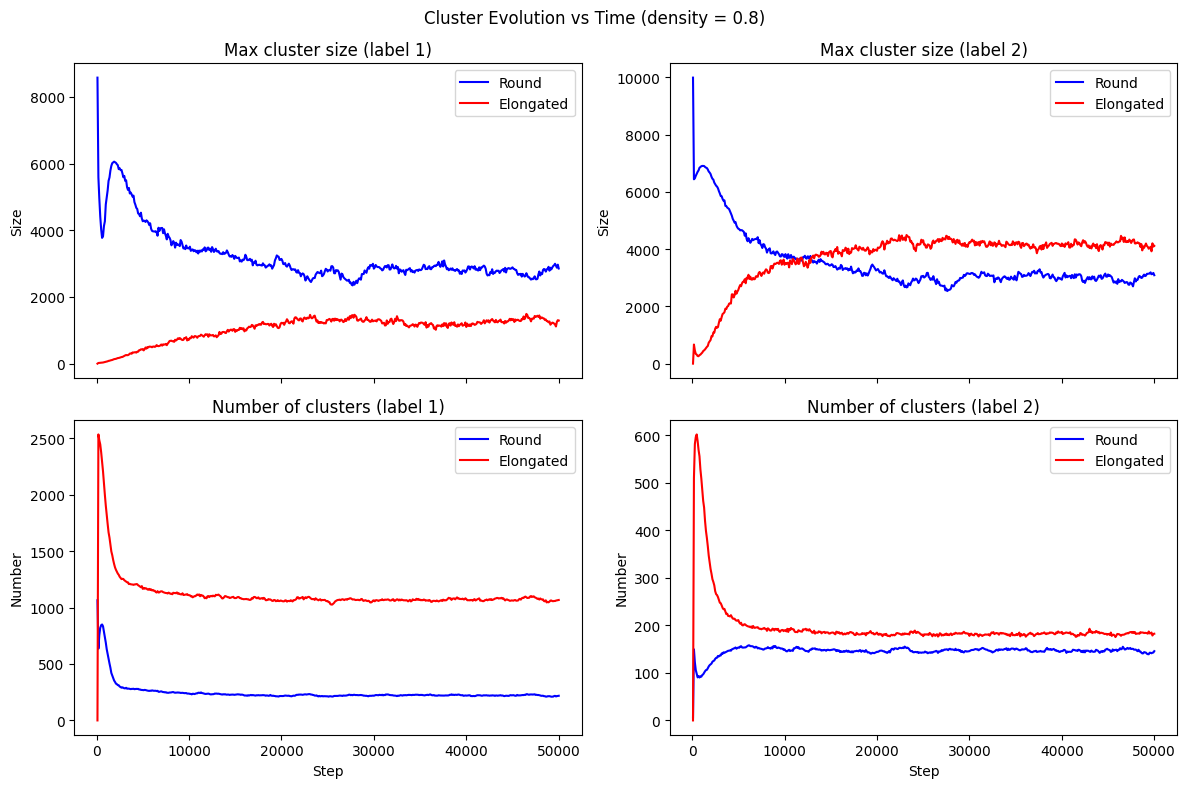

Last step =  10000  for density =  0.9


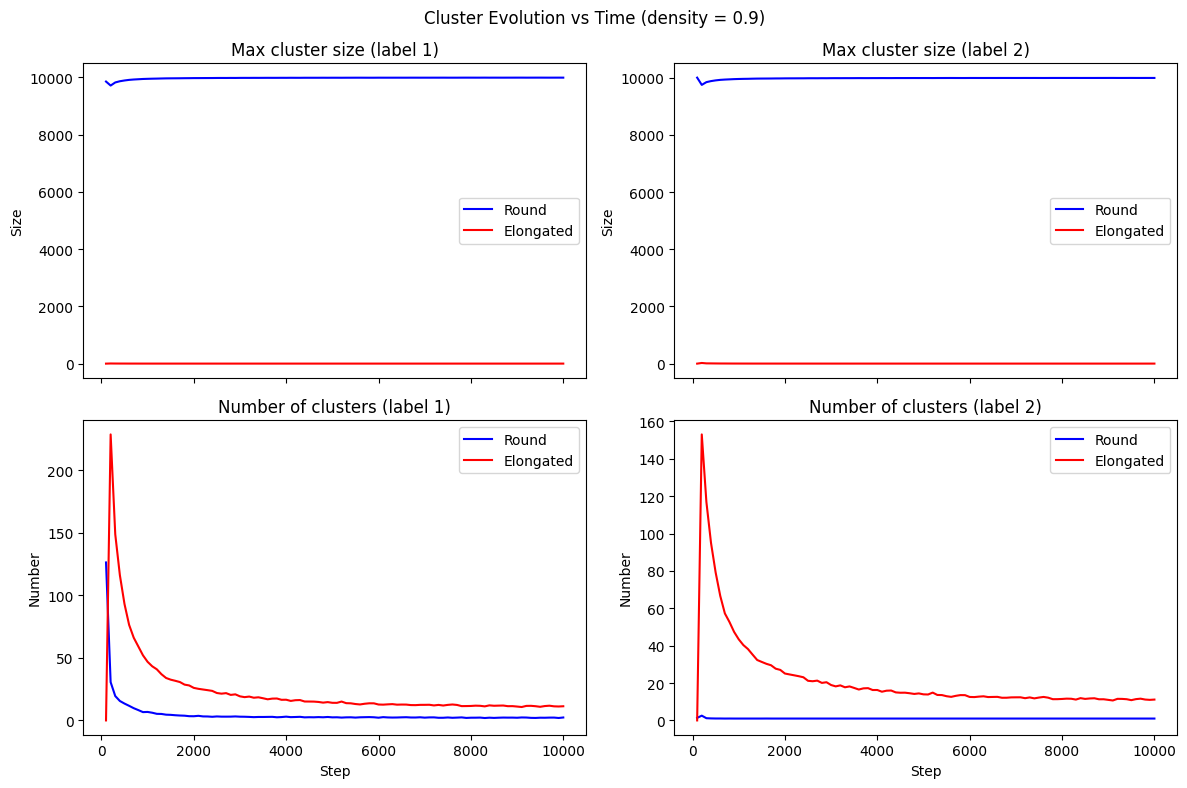

In [7]:
# Create a list with the densities
density_list = [0.5, 0.6, 0.7, 0.8, 0.9]
# Create a dict to save all the dataframes
dfs = {}

for density in density_list:
    # Call the function for the df in that density
    df = calculate_clusters_vs_time(num_cells=nc, dens=density, max_step=max_step, step=step, rng_seed=rng_seed)
    # df.to_csv(f"{density_folder}/clusters_vs_time_density_{density:.2f}.csv", index=False)
    # Add it to the dict
    dfs[density] = df # we can do, for example, dfs[0.85].head()
    # plot
    plot_cluster_evolution(df, dens=density)

# Final cluster distribution

Now we have a csv with all the sizes seen for every seed in the last step for a given density. Let's do a function to plot the distribution.

In [16]:
def plot_cluster_size_distribution(density, num_cells):
    """
    Plots and saves histograms of cluster size distributions
    for both label and label2 (round vs elongated).
    """
    dens_folder = f"{density:.2f}".replace(".", "_")
    input_file = f"{dens_folder}/cluster_distributions_final/cluster_size_distribution_cells={num_cells}_density={density:.2f}.csv"

    if not os.path.exists(input_file):
        print(f"File not found: {input_file}")
        return

    # Create the folder to save the figure
    output_dir = f"graphs/clusters/{dens_folder}"
    os.makedirs(output_dir, exist_ok=True)

    # Read the data
    df = pd.read_csv(input_file)

    # Create the figure
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # First plot, label 1
    sns.histplot(df['sizes_round'].dropna(), bins=30, color='skyblue', label='Round', ax=axes[0], stat='count')
    sns.histplot(df['sizes_elongated'].dropna(), bins=30, color='tomato', label='Elongated', ax=axes[0], stat='count')
    axes[0].set_title(f'Label 1 — density {density}')
    axes[0].set_xlabel('Cluster size')
    axes[0].set_ylabel('Count')
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    axes[0].legend()

    # Second plot, label 2
    sns.histplot(df['sizes_round_2'].dropna(), bins=30, color='skyblue', label='Round', ax=axes[1], stat='count')
    sns.histplot(df['sizes_elongated_2'].dropna(), bins=30, color='tomato', label='Elongated', ax=axes[1], stat='count')
    axes[1].set_title(f'Label 2 — density {density}')
    axes[1].set_xlabel('Cluster size')
    axes[1].set_xscale('log')
    axes[1].set_yscale('log')
    axes[1].legend()

    # Save
    plt.tight_layout()
    output_path = f"{output_dir}/cluster_size_distribution_density={density:.2f}.png"
    plt.savefig(output_path)
    plt.show()
    plt.close()

### Particular density

In the case we want to see only one particular density, continue as follows.

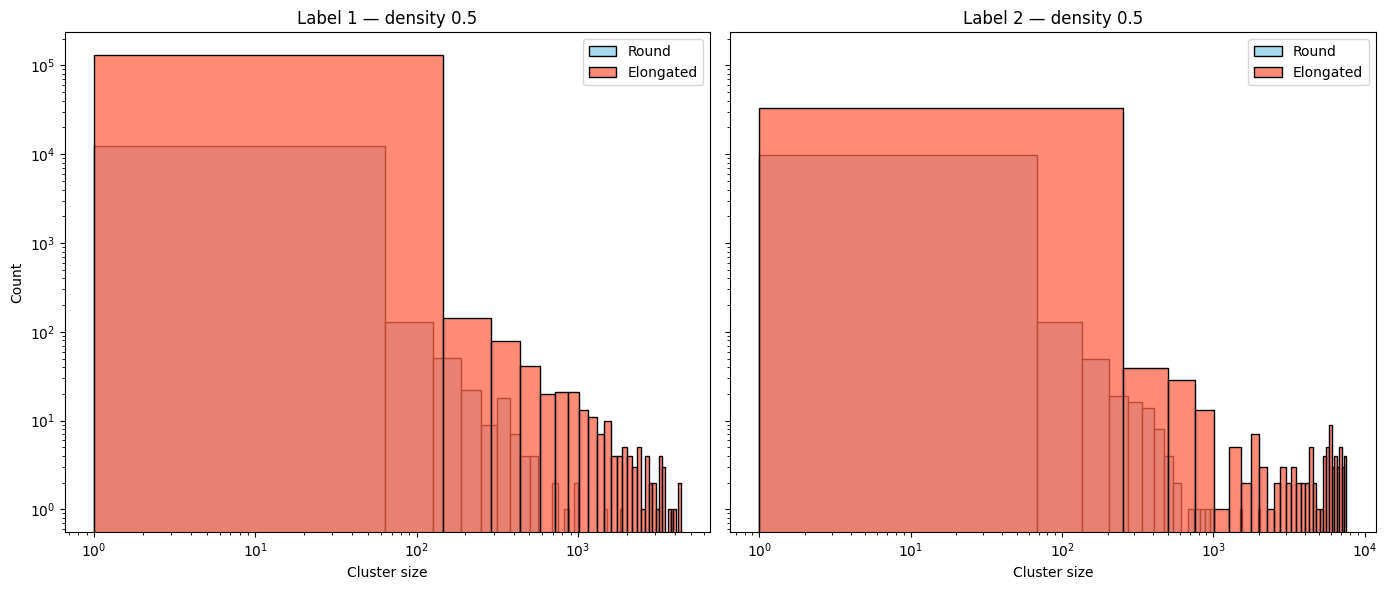

In [17]:
dens_input = input("Enter density (for example 0.90): ")
try:
    density = float(dens_input)
except ValueError:
    print("Error")
    exit()
plot_cluster_size_distribution(density=density, num_cells=nc)

### All densities

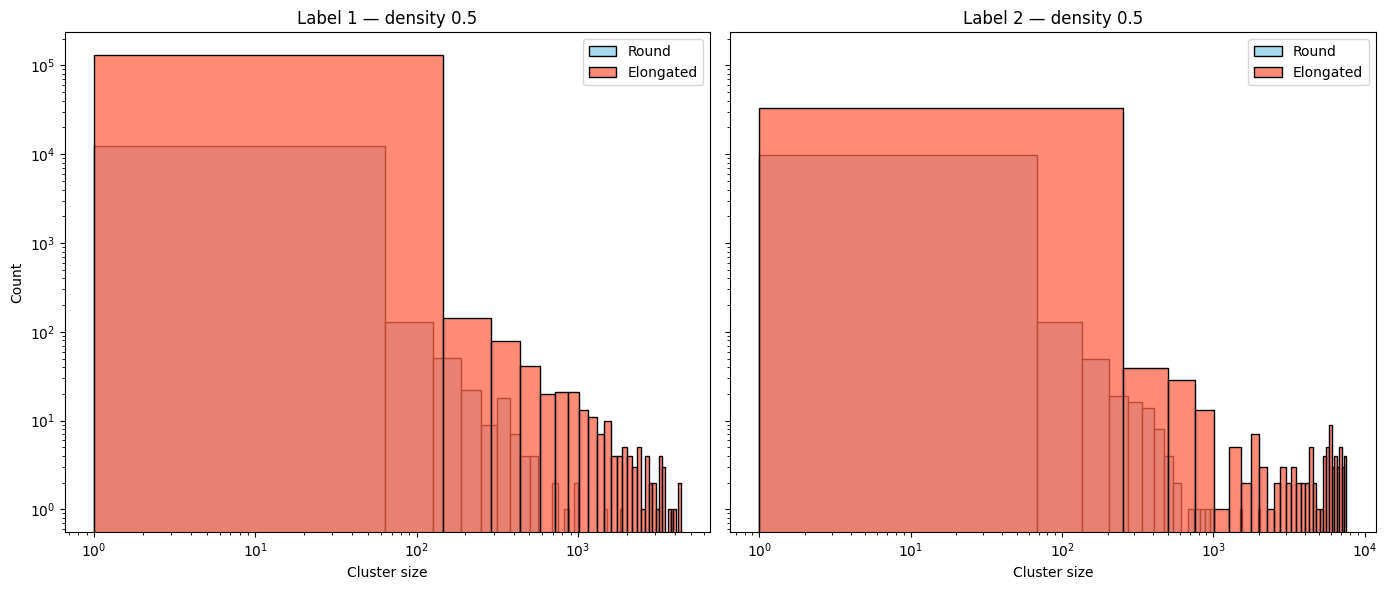

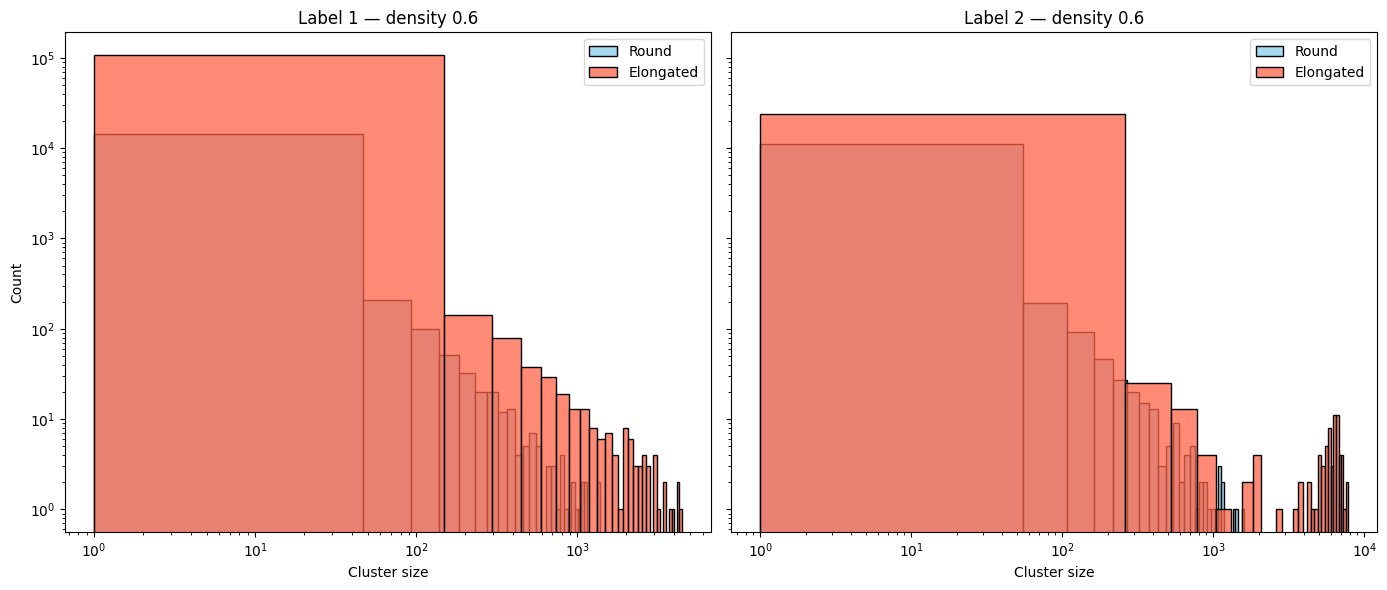

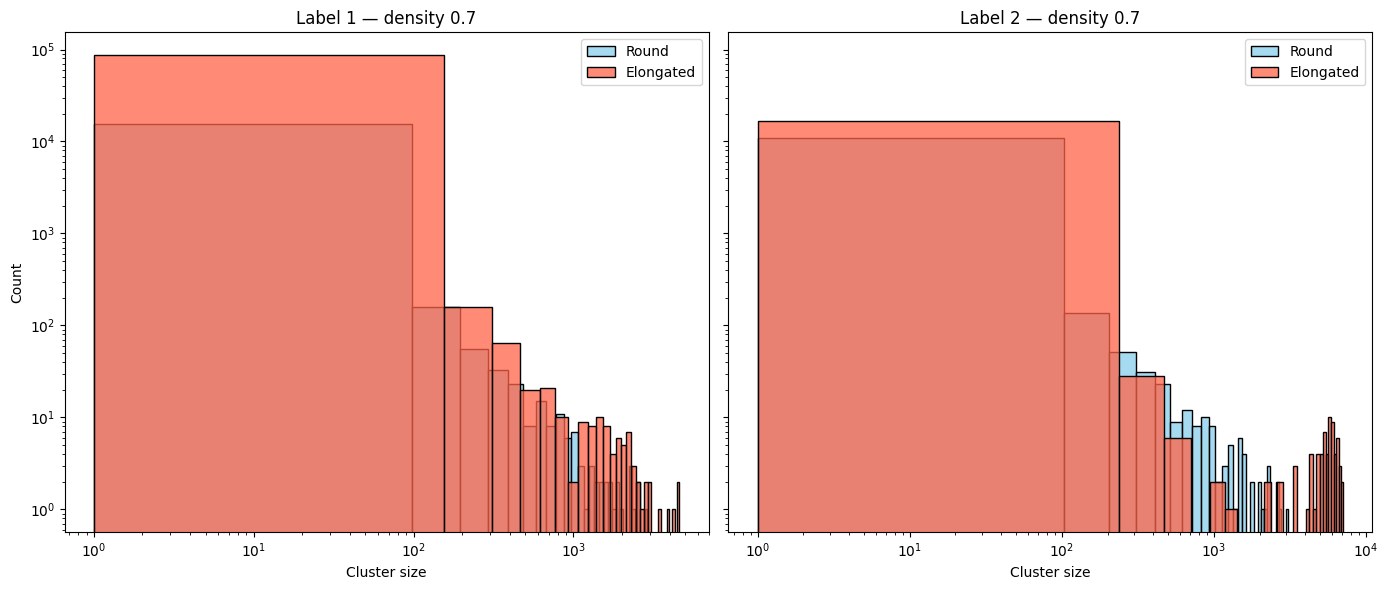

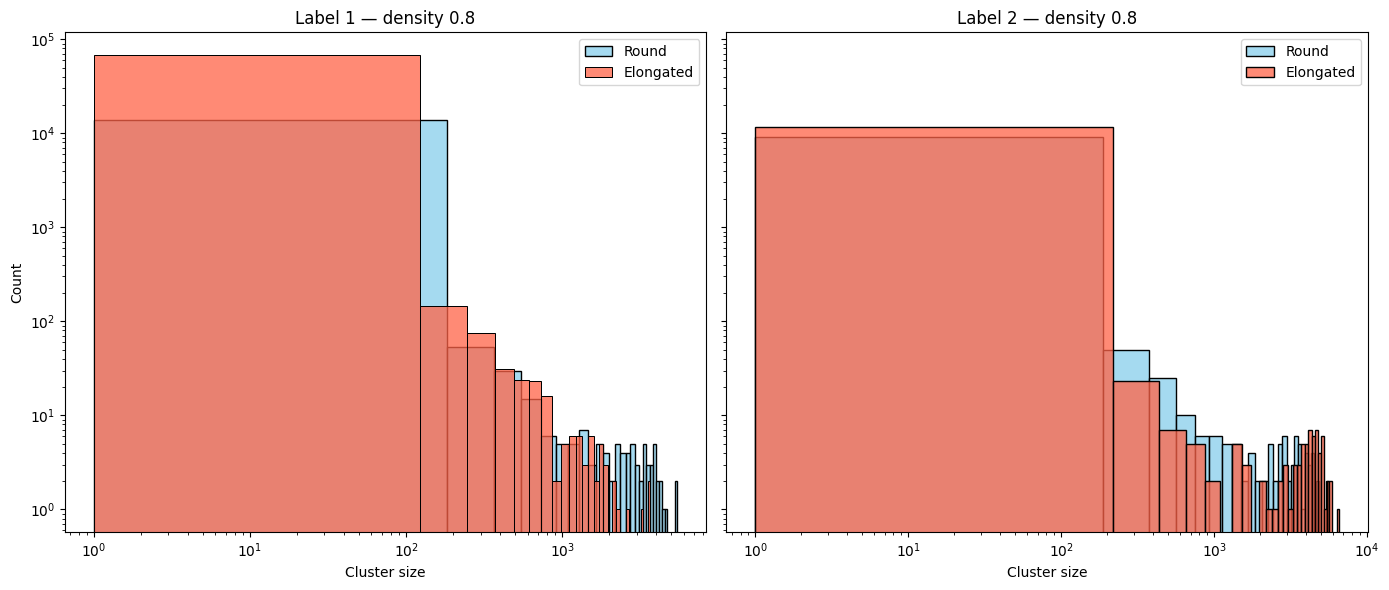

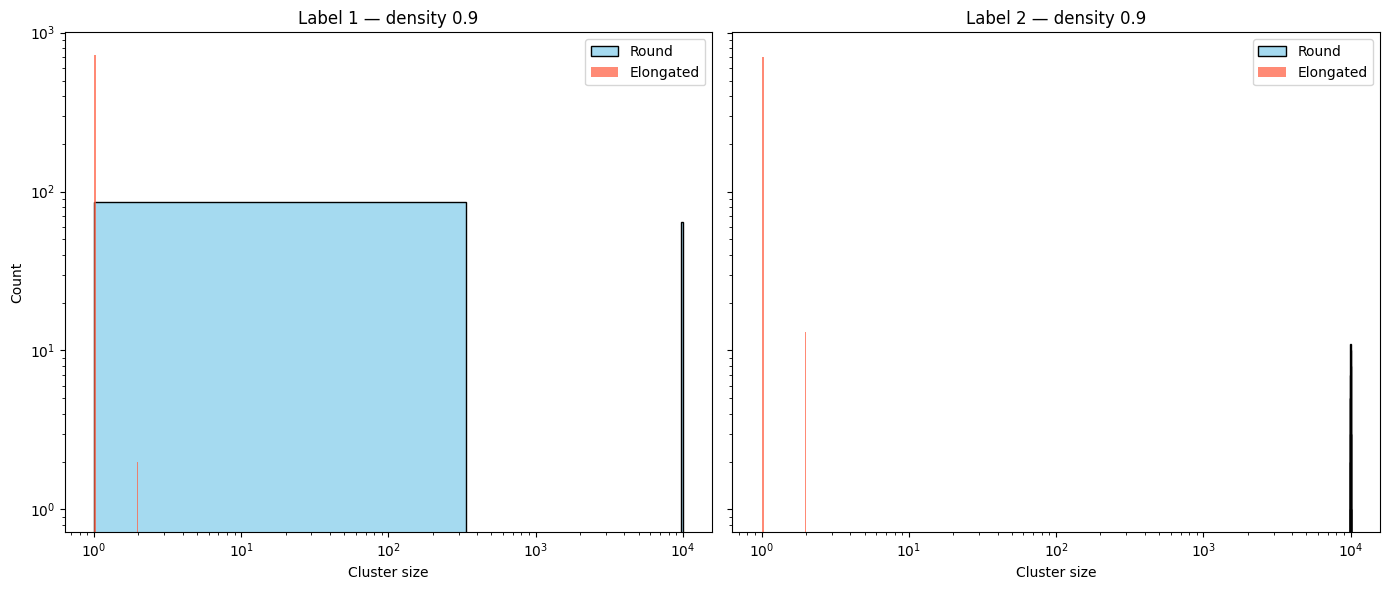

In [18]:
# Create a list with the densities
density_list = [0.5, 0.6, 0.7, 0.8, 0.9]

for d in density_list:
    # plot
    plot_cluster_size_distribution(density=d, num_cells=nc)